<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/planets_res_dens_playground_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0" #use the old version

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 55.2MB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [2]:
!pip install ipdb
from ipdb import set_trace as st

  Created wheel for ipdb: filename=ipdb-0.13.4-cp36-none-any.whl size=10973 sha256=33e8e7448870244e21aaa2cbad228776b7b2849da16a15166dd1d759f0a777c6
  Stored in directory: /root/.cache/pip/wheels/56/51/e4/c91c61e3481a1a967beb18c4ea7a2b138a63cce94170b2e206
Successfully built ipdb


In [3]:
from fastai import *
from fastai.vision import *

In [4]:
def get_label(im_path, **kwargs):
  name = im_path.stem
  return df[df.image_name == name].tags.values[0].split()

In [8]:
im_path = (path/'train').ls()[10]
im_path.stem

'train_28850'

In [9]:
#test
get_label((path/'train').ls()[10])

['clear', 'habitation', 'primary', 'selective_logging']

In [10]:
il = ImageList.from_folder(path/'train')
il, il.items

(ImageList (200 items)
 Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
 Path: /root/.fastai/data/planet_tiny/train,
 array([PosixPath('/root/.fastai/data/planet_tiny/train/train_36622.jpg'),
        PosixPath('/root/.fastai/data/planet_tiny/train/train_12498.jpg'),
        PosixPath('/root/.fastai/data/planet_tiny/train/train_28128.jpg'),
        PosixPath('/root/.fastai/data/planet_tiny/train/train_17844.jpg'), ...,
        PosixPath('/root/.fastai/data/planet_tiny/train/train_31979.jpg'),
        PosixPath('/root/.fastai/data/planet_tiny/train/train_34855.jpg'),
        PosixPath('/root/.fastai/data/planet_tiny/train/train_19125.jpg'),
        PosixPath('/root/.fastai/data/planet_tiny/train/train_15839.jpg')], dtype=object))

In [11]:
split = il.split_by_rand_pct()
split

ItemLists;

Train: ImageList (160 items)
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /root/.fastai/data/planet_tiny/train;

Valid: ImageList (40 items)
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
Path: /root/.fastai/data/planet_tiny/train;

Test: None

In [12]:
labeled = split.label_from_func(get_label)

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [13]:
bs = 64
src = labeled.transform(get_transforms(flip_vert= True), size = 128).databunch(bs= bs)

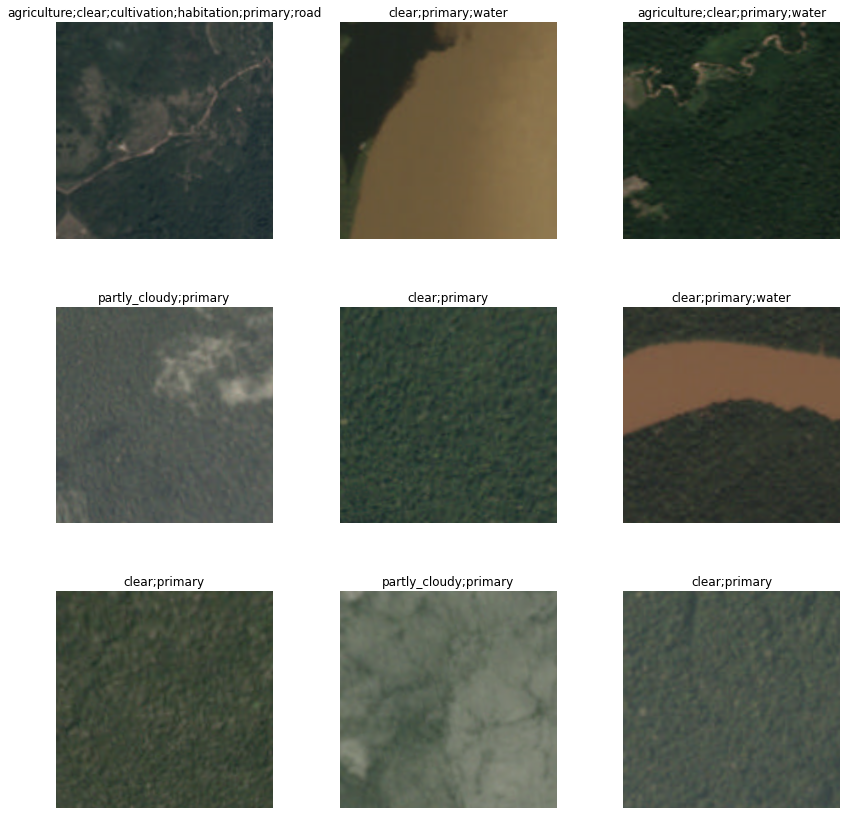

In [14]:
src.show_batch(rows = 3)

In [15]:
data = src.normalize(imagenet_stats)

In [16]:
acc_02 = partial(accuracy_thresh, thresh=0.2)

In [17]:
learn = cnn_learner(data, models.resnet34, metrics = acc_02)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.lr_find()

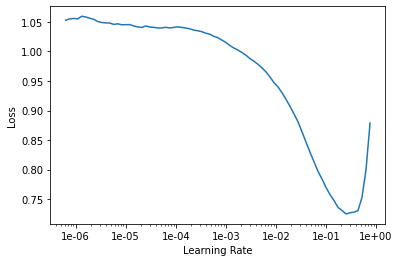

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(6, slice(1e-02))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,1.025369,1.018288,0.280357,00:01
1,0.973384,0.927952,0.292857,00:01
2,0.939596,0.759151,0.339286,00:01
3,0.888898,0.697624,0.383929,00:01
4,0.848623,0.668143,0.446429,00:01
5,0.814011,0.636192,0.466071,00:01


In [21]:
learn.unfreeze()
learn.lr_find()

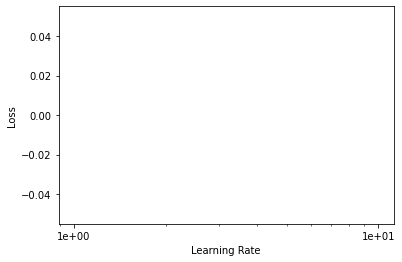

In [22]:
learn.recorder.plot()

In [23]:
learn.save('stage_1')

In [81]:
learn.load('stage_1')
learn.fit_one_cycle(5, slice(1e-04))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.634429,0.703086,0.408929,00:01
1,0.629577,0.668255,0.430357,00:01
2,0.623766,0.646065,0.450000,00:01
3,0.630855,0.621493,0.458929,00:01
4,0.634152,0.608532,0.466071,00:01


In [4]:
keys = {"username":"bindelapranay1997","key":"51917506845c5e4409eb25e392293216"}
import json

In [5]:
path = Path('/root/.kaggle/')
path.mkdir()

In [6]:
!touch /root/.kaggle/kaggle.json

In [7]:
with open ('/root/.kaggle/kaggle.json', 'w') as f:
  f.write(json.dumps(keys))

In [8]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)


In [9]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
path = Config.data_path()/'planet'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

In [11]:
! kaggle competitions download -c 'planet-understanding-the-amazon-from-space' -p /root/.fastai/data/planete

  0% 0.00/148k [00:00<?, ?B/s]
100% 148k/148k [00:00<00:00, 56.2MB/s]
  0% 0.00/600k [00:00<?, ?B/s]
100% 600k/600k [00:00<00:00, 84.7MB/s]
  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 45.8MB/s]
  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 65.5MB/s]
  0% 0.00/1.52M [00:00<?, ?B/s]
100% 1.52M/1.52M [00:00<00:00, 103MB/s]


In [12]:
path, path.ls()

(PosixPath('/root/.fastai/data/planet'),
 [PosixPath('/root/.fastai/data/planet/Kaggle-planet-train-tif.torrent.zip'),
  PosixPath('/root/.fastai/data/planet/train_v2.csv.zip'),
  PosixPath('/root/.fastai/data/planet/sample_submission_v2.csv.zip'),
  PosixPath('/root/.fastai/data/planet/test_v2_file_mapping.csv'),
  PosixPath('/root/.fastai/data/planet/Kaggle-planet-test-tif.torrent.zip')])

In [13]:
! unzip /root/.fastai/data/planet/train_v2.csv.zip -d /root/.fastai/data/planet/train_v2.csv

Archive:  /root/.fastai/data/planet/train_v2.csv.zip
  inflating: /root/.fastai/data/planet/train_v2.csv/train_v2.csv  


In [15]:
Path('/root/.fastai/data/planet/train_v2.csv').ls()

[PosixPath('/root/.fastai/data/planet/train_v2.csv/train_v2.csv')]

In [38]:
! unzip /root/.fastai/data/planet/Kaggle-planet-train-tif.torrent.zip -d /root/.fastai/data/planet/Kaggle-planet-train-tif.torrent

Archive:  /root/.fastai/data/planet/Kaggle-planet-train-tif.torrent.zip
  inflating: /root/.fastai/data/planet/Kaggle-planet-train-tif.torrent/Kaggle-planet-train-tif.torrent  


In [39]:
path.ls()

[PosixPath('/root/.fastai/data/planet/Kaggle-planet-train-tif.torrent.zip'),
 PosixPath('/root/.fastai/data/planet/train_v2.csv.zip'),
 PosixPath('/root/.fastai/data/planet/Kaggle-planet-train-tif.torrent'),
 PosixPath('/root/.fastai/data/planet/sample_submission_v2.csv.zip'),
 PosixPath('/root/.fastai/data/planet/train_v2.csv'),
 PosixPath('/root/.fastai/data/planet/test_v2_file_mapping.csv'),
 PosixPath('/root/.fastai/data/planet/Kaggle-planet-test-tif.torrent.zip')]

In [17]:
path
path = path/'new'
path.mkdir()

In [18]:
path

PosixPath('/root/.fastai/data/planet/new')

In [21]:
path = Path('/root/.fastai/data/planet/')
path.ls()

[PosixPath('/root/.fastai/data/planet/Kaggle-planet-train-tif.torrent.zip'),
 PosixPath('/root/.fastai/data/planet/train_v2.csv.zip'),
 PosixPath('/root/.fastai/data/planet/sample_submission_v2.csv.zip'),
 PosixPath('/root/.fastai/data/planet/train_v2.csv'),
 PosixPath('/root/.fastai/data/planet/test_v2_file_mapping.csv'),
 PosixPath('/root/.fastai/data/planet/Kaggle-planet-test-tif.torrent.zip'),
 PosixPath('/root/.fastai/data/planet/new')]

In [25]:
!rm -rf /root/.fastai/data/planet/train_v2.csv

In [29]:
!unzip -q /root/.fastai/data/planet/train_v2.csv.zip

In [30]:
path.ls()

[PosixPath('/root/.fastai/data/planet/Kaggle-planet-train-tif.torrent.zip'),
 PosixPath('/root/.fastai/data/planet/train_v2.csv.zip'),
 PosixPath('/root/.fastai/data/planet/sample_submission_v2.csv.zip'),
 PosixPath('/root/.fastai/data/planet/test_v2_file_mapping.csv'),
 PosixPath('/root/.fastai/data/planet/Kaggle-planet-test-tif.torrent.zip'),
 PosixPath('/root/.fastai/data/planet/new')]

In [32]:
!pwd

/content


In [33]:
npath = Path('/content')
df = pd.read_csv(npath/'train_v2.csv')

In [35]:
df.head(), len(df)

(  image_name                                       tags
 0    train_0                               haze primary
 1    train_1            agriculture clear primary water
 2    train_2                              clear primary
 3    train_3                              clear primary
 4    train_4  agriculture clear habitation primary road, 40479)

In [36]:
!unzip -q /root/.fastai/data/planet/Kaggle-planet-train-tif.torrent.zip

In [37]:
npath.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/Kaggle-planet-train-tif.torrent'),
 PosixPath('/content/train_v2.csv'),
 PosixPath('/content/sample_data')]

In [39]:
!wget http://7-zip.org/download.html

--2020-12-31 19:29:50--  http://7-zip.org/download.html
Resolving 7-zip.org (7-zip.org)... 159.65.89.65
Connecting to 7-zip.org (7-zip.org)|159.65.89.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.7-zip.org/download.html [following]
--2020-12-31 19:29:50--  https://www.7-zip.org/download.html
Resolving www.7-zip.org (www.7-zip.org)... 159.65.89.65
Connecting to www.7-zip.org (www.7-zip.org)|159.65.89.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10863 (11K) [text/html]
Saving to: ‘download.html’

download.html       100%[===================>]  10.61K  --.-KB/s    in 0s      

2020-12-31 19:29:51 (332 MB/s) - ‘download.html’ saved [10863/10863]



In [40]:
!ls

download.html  Kaggle-planet-train-tif.torrent	sample_data  train_v2.csv


In [5]:
path = untar_data(URLs.PLANET_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/planet_sample/labels.csv'),
 PosixPath('/root/.fastai/data/planet_sample/train')]

In [6]:
len( (path/'train').ls())

1000

In [11]:
def get_label(im_path, **kwargs):
  name = im_path.stem
  return df[df.image_name == name].tags.values[0].split()

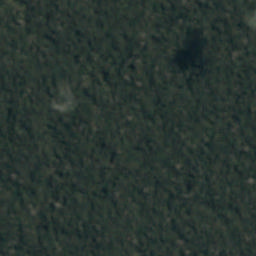

In [7]:
img = open_image((path/'train').ls()[1])
img

In [8]:
path.ls()

[PosixPath('/root/.fastai/data/planet_sample/labels.csv'),
 PosixPath('/root/.fastai/data/planet_sample/train')]

In [9]:
df = pd.read_csv(path/'labels.csv')

In [10]:
src = ImageList.from_folder(path/'train').split_by_rand_pct(0.1).label_from_func(get_label)
src

/usr/local/lib/python3.6/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


LabelLists;

Train: LabelList (900 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
partly_cloudy;primary,clear;primary,clear;cultivation;primary,agriculture;clear;primary,clear;primary
Path: /root/.fastai/data/planet_sample/train;

Valid: LabelList (100 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
cloudy,clear;primary,agriculture;clear;primary;road,agriculture;clear;primary;water,clear;primary
Path: /root/.fastai/data/planet_sample/train;

Test: None

In [11]:
bs = 64
pre_data = src.transform(get_transforms(flip_vert= True, max_lighting=0.0, max_warp=0.0, p_affine=0., p_lighting=0.), size = 128).databunch(bs = bs)
data = pre_data.normalize(imagenet_stats)

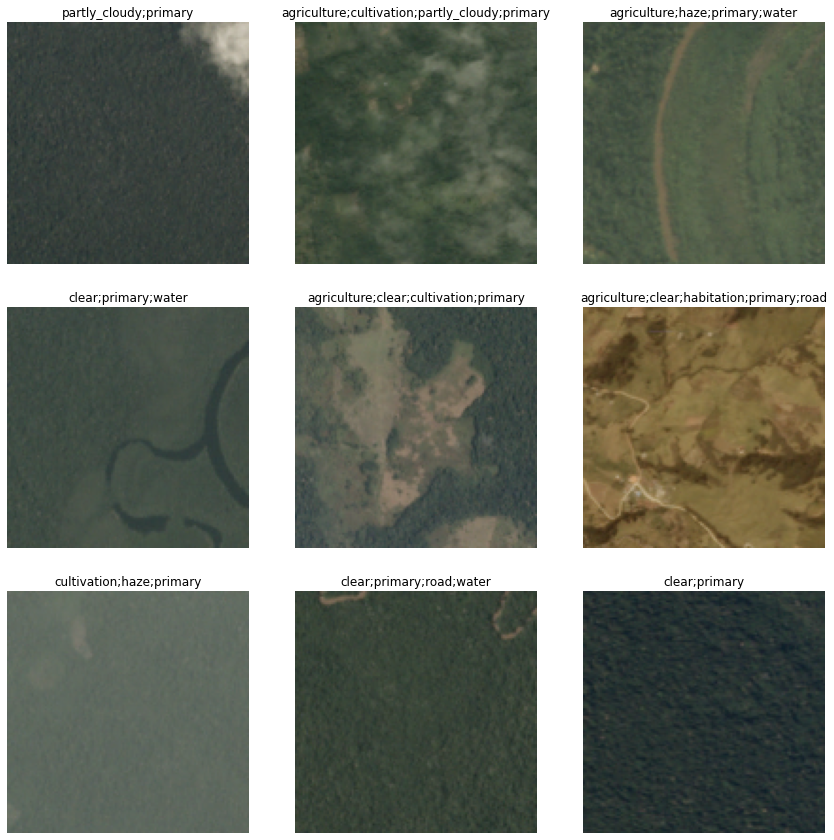

In [12]:
data.show_batch(rows = 3)

In [13]:
acc_multi = partial(accuracy_thresh, thresh = 0.2)

In [54]:
#accuracy
learn = cnn_learner(data, models.resnet34, metrics = acc_multi)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


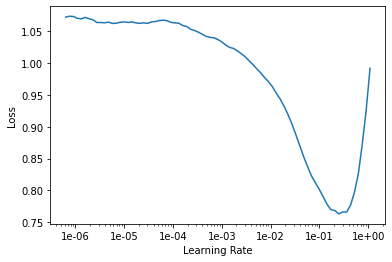

In [57]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(3, slice(1e-02))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.886859,0.583220,0.415294,00:02
1,0.612975,0.198225,0.900588,00:02
2,0.432223,0.172241,0.932941,00:02


In [59]:
learn.unfreeze()
learn.save('stage-1')
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


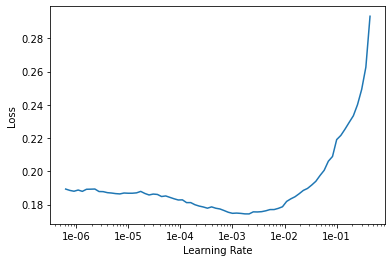

In [60]:
learn.recorder.plot()

In [61]:
learn.load('stage-1')
learn.fit_one_cycle(4, slice(1e-03))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.184981,0.151624,0.937059,00:02
1,0.165917,0.141713,0.937647,00:02
2,0.152379,0.136433,0.944706,00:02
3,0.143640,0.136098,0.944706,00:02


In [63]:
learn.save('stage-2')
learn.freeze()

In [64]:
pre_data = src.transform(get_transforms(flip_vert= True, max_lighting=0.0, max_warp=0.0, p_affine=0., p_lighting=0.), size = 224).databunch(bs = bs)
data = pre_data.normalize(imagenet_stats)

In [65]:
learn.data = data

In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


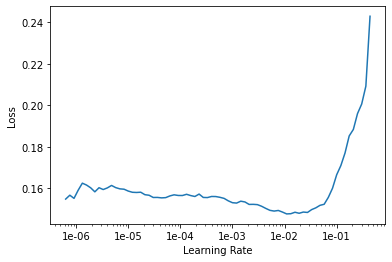

In [67]:
learn.recorder.plot()

In [68]:
learn.load('stage-2')
learn.fit_one_cycle(2, slice(8e-03))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.154054,0.145625,0.945294,00:04
1,0.145554,0.138923,0.946471,00:04


In [69]:
learn.unfreeze()
learn.save('stage-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


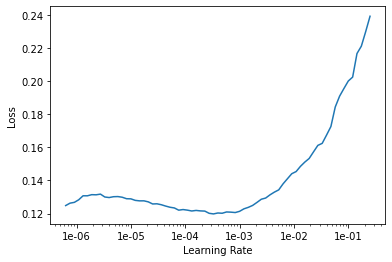

In [70]:
learn.lr_find()
learn.recorder.plot()

In [71]:
learn.fit_one_cycle(3, slice(2e-04))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.121543,0.139286,0.948235,00:04
1,0.118060,0.136910,0.949412,00:04
2,0.113508,0.134364,0.948235,00:04


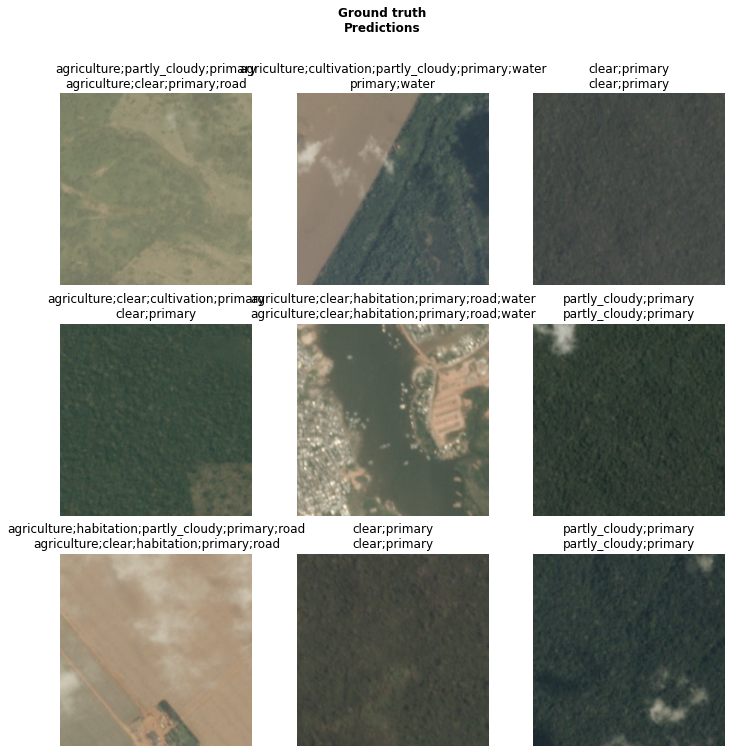

In [72]:
learn.show_results(rows = 3)

In [24]:
#lets create some convs...
#test
for x, y in data.train_dl:
  break
x.shape, y.shape

(torch.Size([64, 3, 128, 128]), torch.Size([64, 16]))

In [25]:
x = x.cpu()
con = nn.Conv2d(3, 8, kernel_size=(3, 3), padding = 1, padding_mode = 'reflection')
yhat = con(x)

In [26]:
yhat.shape

torch.Size([64, 8, 128, 128])

In [27]:
bn, bn_test = nn.BatchNorm2d(8), nn.BatchNorm1d(8)

In [32]:
for i in bn.parameters():
  print(i, i.shape)

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) torch.Size([8])
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True) torch.Size([8])


In [33]:
for i in bn_test.parameters():
  print(i, i.shape)

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) torch.Size([8])
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True) torch.Size([8])


In [34]:
bn.__dict__

{'_backward_hooks': OrderedDict(),
 '_buffers': OrderedDict([('running_mean',
               tensor([0., 0., 0., 0., 0., 0., 0., 0.])),
              ('running_var', tensor([1., 1., 1., 1., 1., 1., 1., 1.])),
              ('num_batches_tracked', tensor(0))]),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True)),
              ('bias', Parameter containing:
               tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))]),
 '_state_dict_hooks': OrderedDict(),
 'affine': True,
 'eps': 1e-05,
 'momentum': 0.1,
 'num_features': 8,
 'track_running_stats': True,
 'training': True}

In [35]:
yhat = bn(yhat)
yhat.shape

torch.Size([64, 8, 128, 128])

In [37]:
print(yhat.mean())
print(F.relu(yhat).mean()) 

tensor(2.3283e-09, grad_fn=<MeanBackward0>)
tensor(0.4072, grad_fn=<MeanBackward0>)


In [25]:
data = pre_data
for x, y in data.train_dl:
  break
x, y = x.cpu(), y.cpu()

In [33]:
def conv_l(ni, nf, padding_mode = 'reflection', kernel_size = (3, 3), padding = 1, stride = 1):
  return nn.Sequential(nn.Conv2d(ni, nf, kernel_size, stride = stride, padding=padding, padding_mode=padding_mode),
                        nn.ReLU(), nn.BatchNorm2d(nf))

In [34]:
#test
c1 = conv_l(3, 8, stride = 2)
yhat = c1(x)

In [35]:
x.shape, yhat.shape

(torch.Size([64, 3, 128, 128]), torch.Size([64, 8, 64, 64]))

In [69]:
#test
yhat = model(x)
yhat.squeeze().shape

tail = nn.Linear(256, num_classes)

pred = tail(yhat.squeeze())
pred.shape

yhat.shape
flt = nn.Flatten()
flt(yhat).shape

In [63]:
enc = nn.Sequential(
    conv_l(3, 8, kernel_size = (4, 4), padding = 2), #3, 128, 128 --> 8, 128, 128
    conv_l(8, 16, stride=2), # 8, 128, 128 --> 16, 64, 64
    conv_l(16, 32, stride = 2),# 16, 64, 64 --> 32, 32, 32
    conv_l(32, 64, stride = 2),# 32, 32, 32 --> 64, 16, 16
    conv_l(64, 128, stride = 2), # 64, 16, 16 --> 128, 8, 8
    conv_l(128, 256, stride = 2), # 128, 8, 8 --> 256, 4, 4
    nn.AdaptiveAvgPool2d((1, 1))
)

In [79]:
num_classes = data.c
tail = nn.Sequential(
    nn.Flatten(),
    nn.Linear(256, num_classes)
)

In [81]:
model = nn.Sequential(enc, tail)
yhat = model(x)
yhat.shape

torch.Size([64, 17])

In [ ]:
#test
for i in model.parameters(): print(i.shape)

In [94]:
orig_loss_func = nn.CrossEntropyLoss()
def updated_loss(input, target):
  return orig_loss_func(input, target.long())

In [ ]:
dir(torch.nn)

In [99]:
learn = Learner(data, model, loss_func = nn.BCEWithLogitsLoss(), metrics = acc_multi)

In [100]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


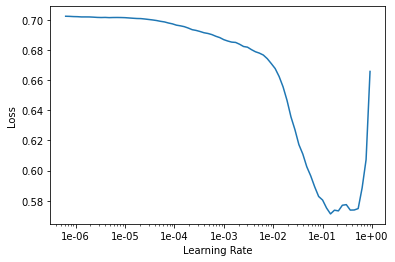

In [101]:
learn.recorder.plot()

In [102]:
learn.fit_one_cycle(4, slice(2e-02))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.628591,0.833752,0.320588,00:02
1,0.417718,0.491426,0.902941,00:02
2,0.335344,0.235698,0.912353,00:02
3,0.289174,0.199391,0.899412,00:02


In [ ]:
learn.lr_find()

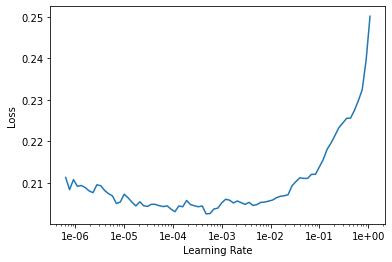

In [104]:
learn.recorder.plot()

In [105]:
learn.fit_one_cycle(5, slice(1e-03))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.204998,0.196807,0.898824,00:02
1,0.205148,0.189204,0.878824,00:02
2,0.201955,0.189056,0.882353,00:02
3,0.200349,0.187244,0.880000,00:02
4,0.199036,0.186083,0.883529,00:02


In [106]:
new_data = src.transform(get_transforms(flip_vert= True, max_lighting=0.0, max_warp=0.0, p_affine=0., p_lighting=0.), size = 224).databunch(bs = bs)

In [107]:
learn.data = new_data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


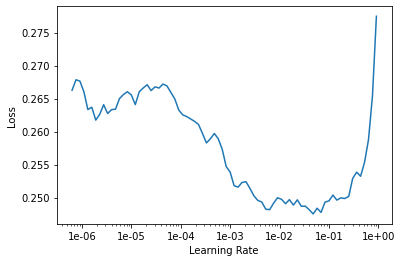

In [108]:
learn.lr_find()
learn.recorder.plot()

In [110]:
learn.save('stage-1')

In [116]:
learn.load('stage-1')
learn.fit_one_cycle(5,  slice(1e-03))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.254669,0.272739,0.872353,00:03
1,0.234738,0.250845,0.901765,00:03
2,0.222334,0.214819,0.877059,00:03
3,0.216159,0.193805,0.903529,00:03
4,0.211620,0.192602,0.898824,00:03


In [158]:
#rres blocks
class ResBlock(nn.Module):
  def __init__(self, nf, is_dens = False):
    super().__init__()
    self.is_dens = is_dens
    self.c1 = nn.Conv2d(nf, nf, kernel_size=(3, 3), padding_mode='reflection', padding = 1)
    self.c2 = nn.Conv2d(nf, nf, kernel_size=(3, 3), padding_mode='reflection', padding = 1)
  
  def forward(self, x):
    res = F.relu(self.c1(self.c2(x)))
    if self.is_dens:
      res = torch.cat((res, x), dim = 1)
    else:
      res += x
    return res

In [159]:
enc = nn.Sequential(
    conv_l(3, 8, kernel_size = (4, 4), padding = 2), #3, 128, 128 --> 8, 128, 128,
    ResBlock(8, is_dens = True),  #8, 16
    conv_l(16, 32, stride=2), # 16, 128, 128 --> 32, 64, 64
    ResBlock(32, is_dens = True), #64
    conv_l(64, 128, stride = 2),# 64, 64, 64 --> 128, 32, 32
    ResBlock(128, is_dens = True), #256
    conv_l(256, 512, stride = 2),# 32, 32, 32 --> 64, 16, 16
    ResBlock(512, is_dens = True),
    conv_l(1024, 1024, stride = 1), # 64, 16, 16 --> 128, 8, 8
    ResBlock(1024),
    # conv_l(128, 256, stride = 2), # 128, 8, 8 --> 256, 4, 4
    # ResBlock(256),
    nn.AdaptiveAvgPool2d((1, 1))
)

num_classes = data.c
tail = nn.Sequential(
    nn.Flatten(),
    nn.Linear(1024, num_classes)
)

model = nn.Sequential(enc, tail)
yhat = model(x)
yhat.shape

torch.Size([64, 17])

In [160]:
model = model.cuda()
learn = Learner(data, model, loss_func = nn.BCEWithLogitsLoss(), metrics = acc_multi)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


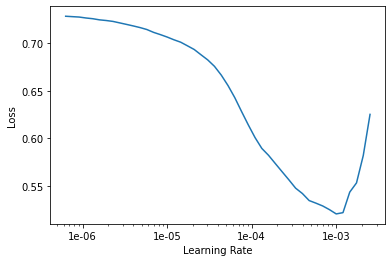

In [162]:
learn.recorder.plot()

In [163]:
learn.fit_one_cycle(4, slice(1e-04))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.565721,0.417108,0.177059,00:08
1,0.385770,0.249482,0.879412,00:08
2,0.311789,0.217223,0.885294,00:08
3,0.270757,0.204320,0.903529,00:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


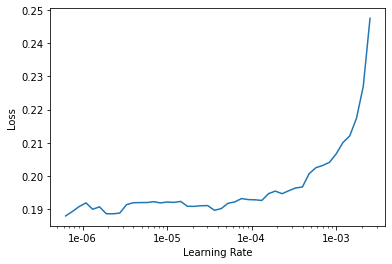

In [164]:
learn.lr_find()
learn.recorder.plot()

In [165]:
learn.fit_one_cycle(7, slice(4e-05))

epoch,train_loss,valid_loss,accuracy_thresh,time
0,0.190186,0.197730,0.904118,00:08
1,0.191987,0.207786,0.903529,00:08
2,0.193480,0.201316,0.913529,00:08
3,0.192273,0.202594,0.888235,00:08
4,0.190799,0.195289,0.898824,00:08
5,0.187139,0.192385,0.904706,00:08
6,0.184202,0.190978,0.908824,00:08
